<a href="https://colab.research.google.com/github/Yosuke-Sugiura/MachineLearning_Exercise/blob/main/%E5%9B%9E%E5%B8%B0%E3%81%AB%E9%96%A2%E3%81%99%E3%82%8B%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ準備

必要データをGoogle Driveにダウンロードして使用する．
ドライブをマウント(連携)するには，左のツーツバーのアイコンから「フォルダ」をクリック，左から３番めの「ドライブをマウント」ボタンをクリックする．

ただし，このコードではGithubにアップロードされているcsvデータをダウンロードする．

In [10]:
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_rm.csv" -O "boston_rm.csv"
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston.csv" -O "boston.csv"
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_poly.csv" -O "boston_poly.csv"
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_cleaning.csv" -O "boston_cleaning.csv"
! wget "https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_nlt.csv" -O "boston_nlt.csv"

--2024-07-25 04:48:27--  https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston_rm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5856 (5.7K) [text/plain]
Saving to: ‘boston_rm.csv’

boston_rm.csv       100%[===================>]   5.72K  --.-KB/s    in 0s      

2024-07-25 04:48:27 (51.2 MB/s) - ‘boston_rm.csv’ saved [5856/5856]

--2024-07-25 04:48:27--  https://raw.githubusercontent.com/Yosuke-Sugiura/MachineLearning_Exercise/main/data/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

---
# 1. 線形回帰



## 1.1 単回帰分析 (特徴量は１つ)

１つの特徴量(`rm`:部屋の広さ)から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. １つ目の図：横軸に`rm`，縦軸に`medv`とした入力と出力の関係をプロットしたもの．
4. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

Coefficients: 
 [9.10210898]
R2 score: 
 0.48352545599133423


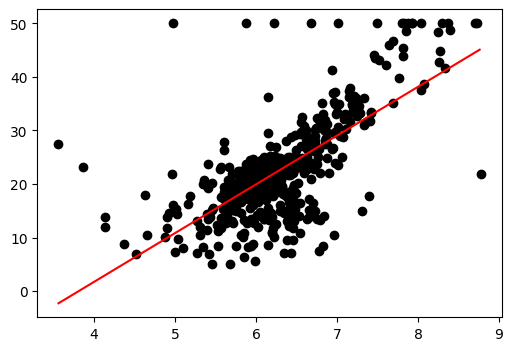

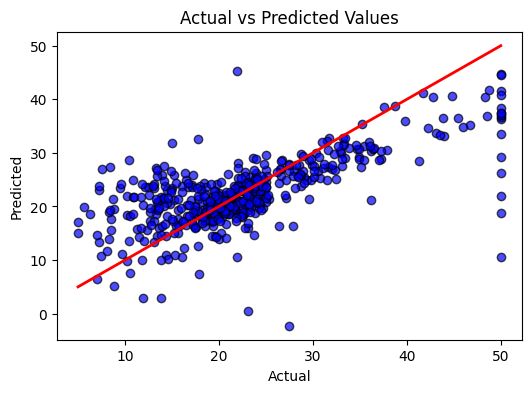

In [4]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_rm.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,0]                  # 0番目の特徴量を読み込んで inputs とする．
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 rm，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

## 1.2 重回帰分析 (特徴量は複数)

複数の特徴量から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

残念ながら，入力(複数の特徴量)と出力の関係をプロットすることは難しい．

Coefficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
R2 score: 
 0.7406426641094095


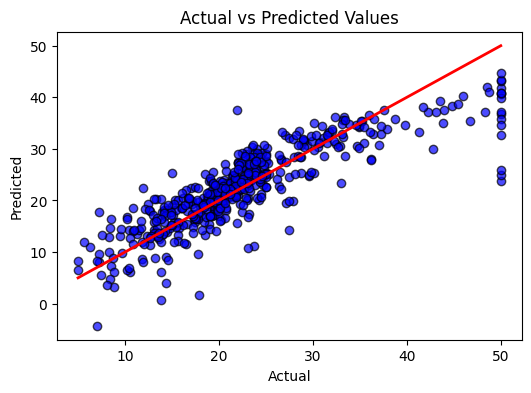

In [3]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

## 1.3. データの標準化

各説明変数のスケール(値の取りうる範囲)を標準化(=平均0，分散1)することで，各特徴量ごとの係数(=**標準偏回帰係数**)から特徴量の重要度を測ることができる．

標準偏回帰係数の絶対値が大きいほど回帰における重要度が高いと言える．
- 係数が絶対値の大きい正の値：その説明変数と目的変数が正の相関
- 係数が絶対値の大きい負の値：その説明変数と目的変数が負の相関
- 係数の絶対値が小さい：その説明変数と目的変数の相関が低い

ちなみに，標準化しても予測精度(R2スコア)は変わらない．あくまで，標準偏回帰係数から各説明変数における重要度を測ることが目的である．

### 標準化した重回帰

Coefficients: 
 [-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]
R2 score: 
 0.7406426641094094


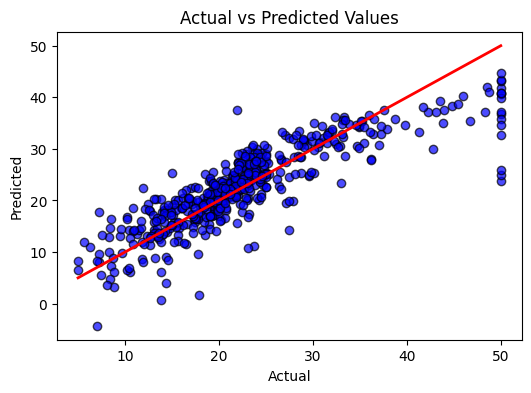

In [9]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler # 標準化を行う関数

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# -------------------------
# 標準化関数による説明変数の標準化
scaler = StandardScaler()   # 標準化関数をscalerという変数で定義
scaler.fit(inputs)          # 各説明変数ごとにの平均・分散を求める
inputs = scaler.transform(inputs) # 標準化の実行
# -------------------------

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# 2. 多項式回帰

２次の多項式回帰を実装してみよう．まず，「+コード」からコードセルを作成する．次に重回帰分析のコードを`Ctl+C`でコピー，コードセルに`Ctl+V`で貼り付ける．

次に，多項式回帰用のデータを作成する．boston.csvに，1~13列目を二乗した列を追加する．ただし，目的変数である`medv`は二乗せず，また最後の列には`medv`がくるよう，列の順番を調整すること．

データを作成できたらアップロードしてコードを実行する．

Coefficients: 
 [-3.74645322e-01 -5.87616414e-02 -1.51846482e-01  1.31922136e+00
 -1.89654891e+01 -1.91817555e+01 -2.10543062e-02 -2.57257040e+00
  6.07118362e-01 -2.56735900e-02 -5.15962973e+00  2.26817863e-02
 -1.31781148e+00  2.99008495e-03  7.28538297e-04  6.97330659e-03
  1.31922136e+00 -3.23870830e+00  1.74102977e+00  1.70557637e-04
  1.35844019e-01 -8.65137278e-03  1.51934593e-05  1.23305076e-01
 -3.73899586e-05  2.26488455e-02]
R2 score: 
 0.831235466151102


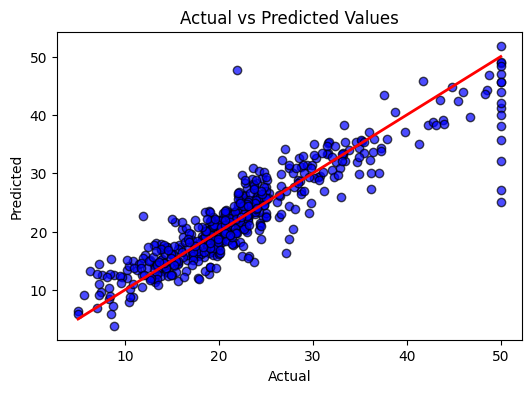

In [2]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_poly.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# 3. 一般線形回帰

データに偏りがある場合に，その**偏りを補正するような関数をデータに施す**ことで予測精度が向上する．

まずは通常の線形回帰をやってみる．
１つの特徴量(`lstat`:低所得者の割合)から目的変数(`medv`:住宅価格)を予測する．  
このコードの出力は以下の通り．
1. 予測モデルにおけるパラメータ(重み，傾き)の値
2. R2スコア(1に近いほど良好．)
3. １つ目の図：横軸に`lstat`，縦軸に`medv`とした入力と出力の関係をプロットしたもの．
4. ２つ目の図：横軸に`実際の値`，縦軸に`予測した値`をプロットしたもの．y=xの直線にデータが分布すると優れたモデルだと言える．

## 4.1 通常の線形単回帰 (再掲，比較用)

Coefficients: 
 [-0.95004935]
R2 score: 
 0.5441462975864797


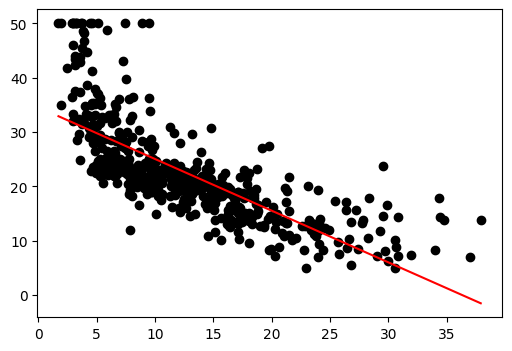

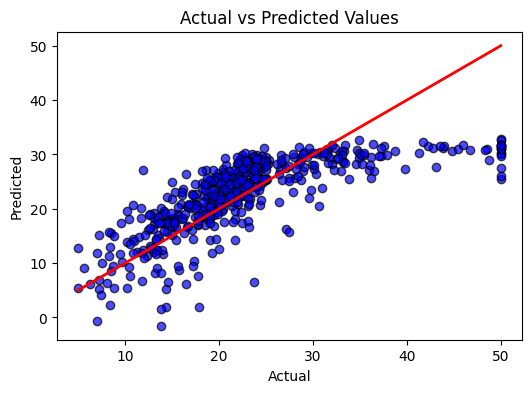

In [5]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,12]                 # 12番目のlstatのみを入力にする
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 rm，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

上の入力と出力の関係を見ると，指数関数 e^(-x) に従う形になっている．なので，目的変数に対数関数(指数関数のリンク関数)を施してデータを補正して線形回帰を行う．ただし，モデルの予測値は(目的変数に対数をとったもの)になるため，予測値に 指数関数をかけて元の(目的変数)の値にもどす．

## 4.2 一般化線形単回帰

Coefficients: 
 [-0.04608043]
R2 score: 
 0.6033476561997181


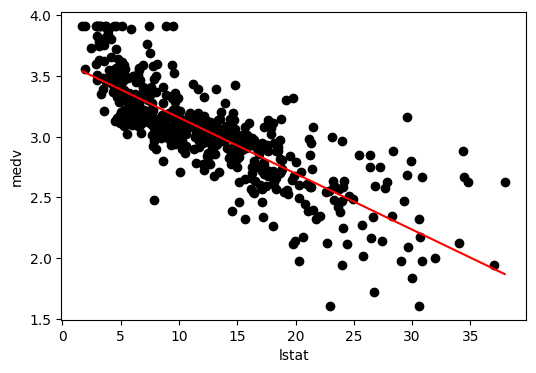

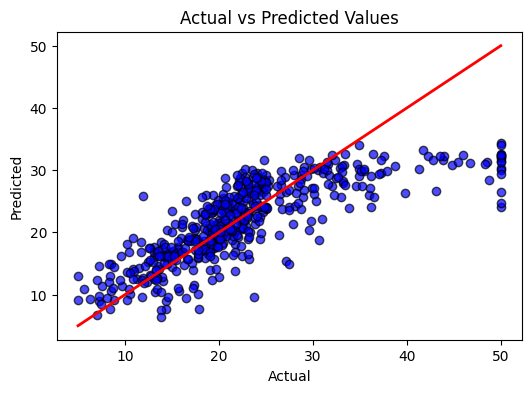

In [19]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,12]                 # 12番目のlstatのみを入力にする
inputs = inputs[:,np.newaxis]       # 単回帰を行う際のおまじない

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

#---------------------------
# 出力が負の指数を逆さにしたような形状．
# 出力に対数のリンク関数(逆関数)である対数関数を施す．
outputs_glm = np.log(outputs)
#---------------------------

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs_glm)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)       # inputsをもとに学習モデルで予測を行う．

#---------------------------
# 出力に指数関数をかけてもとにもどす
predicts = np.exp(predicts)
#---------------------------


# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)

# 横軸 lstat，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs_glm,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

---
# 5. データ整形

データの`medv`の値を見ると，**最大値が50**となっている．これはデータを計測する際，`medv`の値に50以上の数値があったとしてもそれを50に丸めた結果だと考えられる．

このようなデータは予測・分類に悪影響を与える可能性がある．**異常値**を削除して予測精度を上げよう．

異常値を除去したデータがないので，自身で作成する．まずはboston.csvデータをダウンロードし，Excel等で開いてから`medv`=50となる行を削除する．
そのデータを`boston_cleaning.csv`として保存する．このファイルをアップロードして読み込む．


## 5.1 異常値を除去した後の重回帰分析

Coefficients: 
 [-1.06715912e-01  3.53133180e-02 -4.38830943e-02  4.52209315e-01
 -1.23981083e+01  3.75945346e+00 -2.36790549e-02 -1.21096549e+00
  2.51301879e-01 -1.37774382e-02 -8.38180086e-01  7.85316354e-03
 -3.50107918e-01]
R2 score: 
 0.7776594795880641


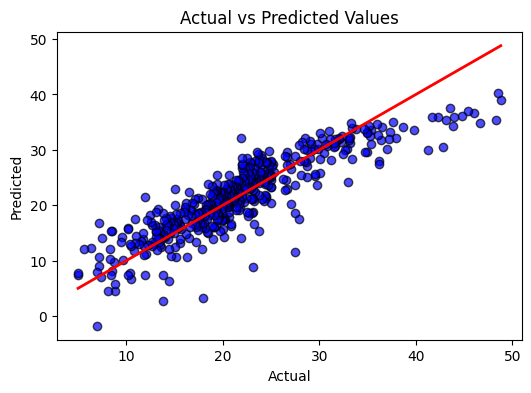

In [7]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_cleaning.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

# 6. データ加工

ある特徴量と目的変数の間に非線形な関係があるとき，一般化線形回帰よりも，いっそその特徴量を関数変換(=射影)して線形性を持つよう加工することの方が手軽なときもある．

ここでは例として，`lstat`(低所得者の割合)のみを対数関数で射影する．

## 6.1 データ加工した後の単回帰分析

1. `boston.csv`をダウンロードする．
2. M列のlstatに対して対数関数(Excelの関数LOG)を利用して対数値を算出する．
3. M列をlstatの対数値で上書きする．
4. `boston_ntl.csv`で保存する．
5. Google Colabのファイルウィンドウにアップロードする．

Coefficients: 
 [-28.73850043]
R2 score: 
 0.6649462248254538


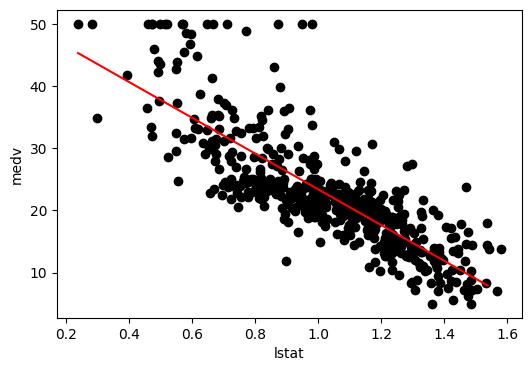

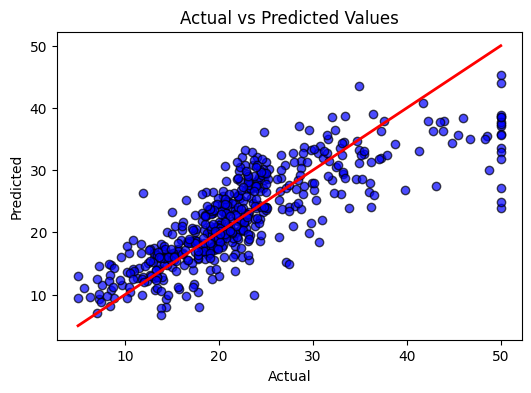

In [20]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_nlt.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,12]                 # 12番目のlstatのみを入力にする
inputs = inputs[:, np.newaxis]

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 横軸 lstat，縦軸 medv でデータの関係を可視化する．
plt.figure(figsize=(6, 4))
x_min = np.min(inputs)
x_max = np.max(inputs)
plot_x = np.arange(x_min,x_max,0.1)
plot_x = plot_x[:,np.newaxis] # convert [*,*,*,..] -> [[*],[*],[*],...]
plt.scatter(inputs[:,0], outputs,  color='black')
plt.plot(plot_x[:,0], regr.predict(plot_x), color='red')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')

## 6.2 データ加工した後の重回帰分析

1. `boston.csv`をダウンロードする．
2. M列のlstatに対して対数関数(Excelの関数LOG)を利用して対数値を算出する．
3. M列をlstatの対数値で上書きする．
4. `boston_ntl.csv`で保存する．
5. Google Colabのファイルウィンドウにアップロードする．

Coefficients: 
 [-1.27910646e-01  2.43833950e-02  1.60952081e-02  2.13684205e+00
 -1.61922092e+01  2.41500495e+00  2.68988818e-02 -1.23560629e+00
  3.01500809e-01 -1.13770117e-02 -8.61362084e-01  7.66986156e-03
 -2.11096469e+01]
R2 score: 
 0.7925334651589996


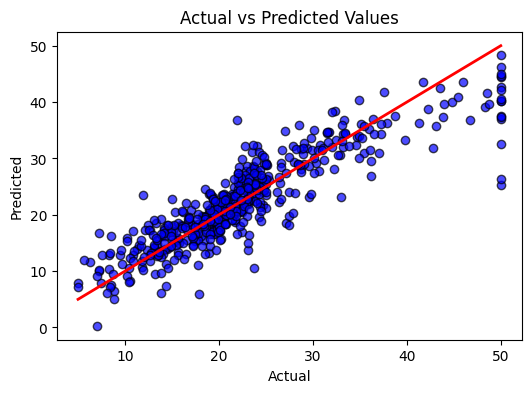

In [22]:
# モジュール(関数が詰め込まれたツールボックス)をインポートする．
# これで高度な関数が好かえるようになる．
import numpy as np                  # numpyモジュールを読み込んで"np"と名付ける
import matplotlib.pyplot as plt     # matplotlib.pyplotモジュールを読み込んで"plt"と名付ける
from sklearn import linear_model    # sklearnモジュールからlinear_modelを読み込む(名前はそのままlinear_model)
from sklearn.metrics import r2_score

# データの読み込み
# 自身のデータを使うなら...
# 1. csvファイルを作成する．1行目は特徴量のラベルを入れる(boston.csvを参考に)．
# 2. 左ツールバーのフォルダアイコンをクリック
# 3. 作成したcsvファイルをドラッグ&ドロップ
with open("boston_nlt.csv", 'r') as file:
    line = file.readline()
    data = np.loadtxt(file, delimiter=',')

# 入力の設定
inputs = data[:,:-1]                # 最後の列以外の列を inputs に設定する．

# 出力の設定
outputs = data[:,-1]                # 最後の列の特徴量を読み込んで outputs とする．

# 回帰分析を行う
regr = linear_model.LinearRegression()  # 回帰分析を行うオブジェクト"regr"を設定する．
regr.fit(inputs, outputs)               # 入力と出力の関係を学習する．

# 予測した値を算出する
predicts = regr.predict(inputs)     # inputsをもとに学習モデルで予測を行う．

# 傾きの値を表示する
print('Coefficients: \n', regr.coef_)

# R2スコア(1に近いほど予測性能が優れる)を算出する
R2 = r2_score(outputs, predicts)
print('R2 score: \n', R2)           # R2スコアを表示する

# 予測値と実測値がどれだけずれているかを図で確認する．
plt.figure(figsize=(6, 4))
plt.plot([outputs.min(), outputs.max()], [outputs.min(), outputs.max()], color='red', lw=2)
plt.scatter(outputs, predicts, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# 予測値を保存する．
np.savetxt("predict.csv", predicts, delimiter=",", header='predict')